## Import necessary Libraries

In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import yfinance as yf

# Fetch stock data from Yahoo Finance
stock_symbol = ['AAPL','AMZN','GOOG','MSFT']  
data = yf.download(stock_symbol, start='2015-01-01', end='2024-01-01')

# Step 4: Data Preprocessing
# Use only the 'Close' price for prediction
data = data[['Close']]
data.head()


[*********************100%***********************]  4 of 4 completed


Price                          Close                               
Ticker                          AAPL     AMZN       GOOG       MSFT
Date                                                               
2015-01-02 00:00:00+00:00  27.332500  15.4260  26.168653  46.759998
2015-01-05 00:00:00+00:00  26.562500  15.1095  25.623152  46.330002
2015-01-06 00:00:00+00:00  26.565001  14.7645  25.029282  45.650002
2015-01-07 00:00:00+00:00  26.937500  14.9210  24.986401  46.230000
2015-01-08 00:00:00+00:00  27.972500  15.0230  25.065184  47.590000

# Fetch and Download Data

In [23]:
# Fetch stock data from Yahoo Finance
stock_symbol = ['AAPL','AMZN','GOOG','MSFT']  
data = yf.download(stock_symbol, start='2015-01-01', end='2024-01-01')

# Data Preprocessing
# Use only the 'Close' price for prediction
data = data[['Close']]
data.head()

[*********************100%***********************]  4 of 4 completed


Price                          Close                               
Ticker                          AAPL     AMZN       GOOG       MSFT
Date                                                               
2015-01-02 00:00:00+00:00  27.332500  15.4260  26.168653  46.759998
2015-01-05 00:00:00+00:00  26.562500  15.1095  25.623152  46.330002
2015-01-06 00:00:00+00:00  26.565001  14.7645  25.029282  45.650002
2015-01-07 00:00:00+00:00  26.937500  14.9210  24.986401  46.230000
2015-01-08 00:00:00+00:00  27.972500  15.0230  25.065184  47.590000

## Normalize Data

In [24]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

## Show only 60 Days data

In [25]:
# Prepare the dataset with a sliding window of 60 time steps
window_size = 60  

X_data, y_data = [], []

for i in range(window_size, len(scaled_data)):
    X_data.append(scaled_data[i-window_size:i, 0])
    y_data.append(scaled_data[i, 0]) 

## Build LSTM model and Split that into train and test data

In [26]:
# Convert to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

# Reshape X_data to be 3D for LSTM input (samples, time steps, features)
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)

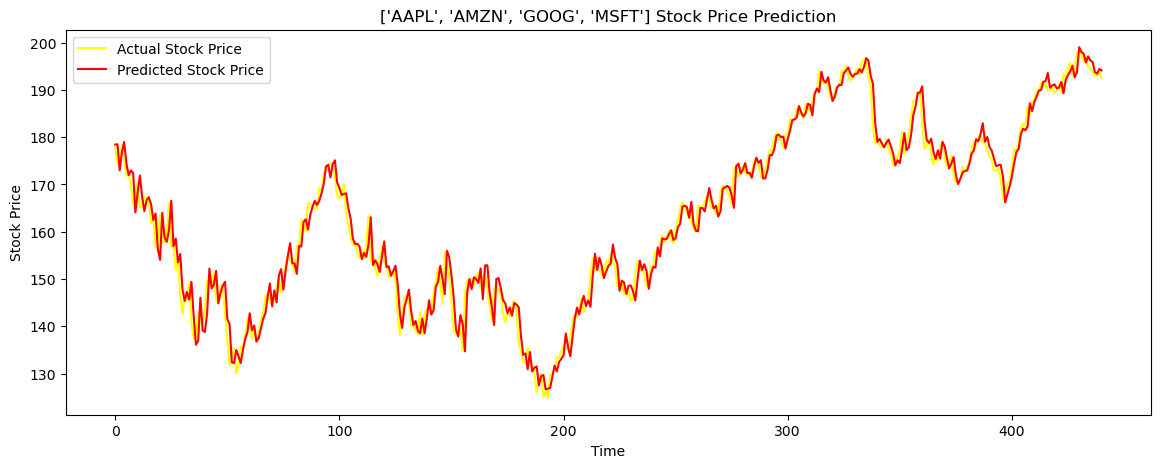

In [27]:
# Assuming y_pred and y_test are 1D arrays
y_pred = y_pred.reshape(-1, 1)
y_pred_extended = np.hstack([y_pred, np.zeros((y_pred.shape[0], 3))])

y_test = y_test.reshape(-1, 1)
y_test_extended = np.hstack([y_test, np.zeros((y_test.shape[0], 3))])

# Now apply inverse_transform with the extended shape
y_pred_actual = scaler.inverse_transform(y_pred_extended)[:, 0]
y_test_actual = scaler.inverse_transform(y_test_extended)[:, 0]

# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='Yellow', label='Actual Stock Price')
plt.plot(y_pred_actual, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




